<a href="https://colab.research.google.com/github/MoseT1/Machine-Learning/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_%EC%8B%A4%EC%8A%B5_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
df = pd.read_csv('english.csv')

df_corr = df.corr(method ='pearson')
df_corr

In [ ]:
import pandas as pd

df = pd.read_csv('english.csv')

df_corr = df.corr(method ='pearson')
df_corr


,TOEIC,TEPS,TOEFL
TOEIC,1.000000,0.981703,0.065584
TEPS,0.981703,1.000000,0.022775
TOEFL,0.065584,0.022775,1.000000


In [ ]:
df = pd.read_csv('english.csv')

df_corr = df.corr(method ='spearman')
df_corr


,TOEIC,TEPS,TOEFL
TOEIC,1.000000,0.975957,0.063057
TEPS,0.975957,1.000000,0.017817
TOEFL,0.063057,0.017817,1.000000


In [ ]:
df = pd.read_csv('english.csv')

df_corr = df.corr(method ='kendall')
df_corr


,TOEIC,TEPS,TOEFL
TOEIC,1.000000,0.883242,0.034965
TEPS,0.883242,1.000000,0.018584
TOEFL,0.034965,0.018584,1.000000


In [ ]:
df = pd.read_csv('animal.csv')

df_corr = df.corr('pearson')
df_corr

,temperature,height
temperature,1.000000,-0.999257
height,-0.999257,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('score.csv')
df

,StudentNo,1st,2nd,3rd,6mo,9mo,suneung
0,STD0001,5.14,1.29,4.19,261,251,300
1,STD0002,6.55,5.87,1.99,239,271,299
2,STD0003,1.92,1.36,2.14,138,258,299
3,STD0004,4.13,5.52,1.73,163,299,298
4,STD0005,8.81,2.29,3.61,269,293,297
...,...,...,...,...,...,...,...
295,STD0296,1.91,5.69,2.23,245,102,185
296,STD0297,1.27,4.92,2.68,172,113,185
297,STD0298,1.53,5.21,4.58,65,199,184
298,STD0299,1.51,3.44,4.92,48,175,184


In [ ]:
df_x = df[['1st', '2nd', '3rd', '6mo', '9mo']]
df_y = df['suneung']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[ -4.61766891  -7.91235005 -10.87464467   0.2275033    0.55214047]
170.13882090429533


In [ ]:
predict = reg.predict(X_test)
predict

array([259.716659  , 210.11587533, 214.57971183, 212.37168339,
       212.66095257, 247.61476768, 221.84045001, 221.24130729,
       232.06060898, 251.03740525, 255.36044566, 266.20398724,
       230.84499348, 215.03230641, 231.10777851, 194.09355455,
       186.18194242, 203.94488331, 209.0955712 , 279.43725383,
       276.26621663, 221.24882939, 214.37001615, 221.80340893,
       220.89928279, 203.87925473, 235.87199098, 254.66843373,
       234.46856716, 193.68577714, 211.12627076, 215.26642755,
       223.02391065, 253.22716551, 242.94520542, 301.08805867,
       205.7193523 , 261.2808819 , 256.98958536, 258.82154957,
       223.40598147, 223.27355595, 246.2952412 , 178.92962431,
       242.63168499, 205.18204406, 226.10059662, 269.61010296,
       210.39520038, 212.62561349, 287.68282558, 240.36407695,
       237.10617074, 175.4379731 , 232.21286462, 232.85717182,
       183.0168673 , 245.06478407, 245.11644615, 224.75872439])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [ ]:
r2_score(y_test, predict)

0.6844393648230191

In [21]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

reg_Lasso = Lasso(alpha = 5)
reg_Lasso.fit(X_train, y_train)

print(reg_Lasso.coef_)
print(reg_Lasso.intercept_)

[-2.97302505 -5.91338941 -8.56852164  0.18997233  0.47637006]
166.97245367065443


In [22]:
!pip install graphviz

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [26]:
df = pd.read_excel('telecom.xlsx')
df = pd.get_dummies(df, columns = ['Technology'])
df_x = df.iloc[:, [0,1,2,4,5,6,7]]
df_y = df['Leave']

In [27]:
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5)
tree_model.fit(df_x, df_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

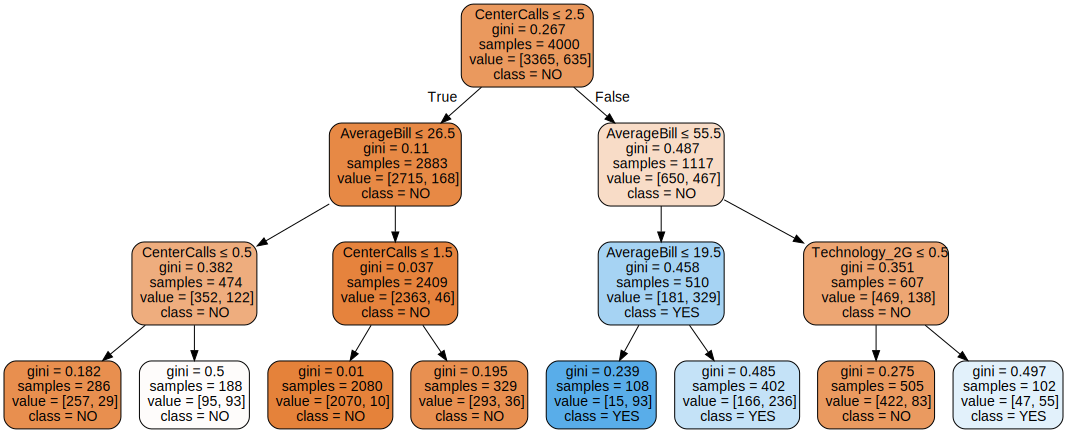

In [28]:
dot_data = export_graphviz(tree_model, out_file = None,
                           feature_names = df_x.columns,
                           class_names = tree_model.classes_,
                           filled = True, rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph